# **PMF**

**Miembros del grupo JAP:**
1. Anny Álvarez Nogales
2. Paula Arias Fernández
3. Jorge del Castillo Gómez
---
Es un modelo de filtrado colaborativo basado en descomposición matricial. Se usa en sistemas de recomendación para predecir qué ítems le gustarán a un usuario en función de su historial de interacciones.

Aclaración: *La clase PMF definida en el archivo ProbabilisticMatrixFactorization.py tiene su fuente en el repositorio de GitHub: https://github.com/fuhailin/Probabilistic-Matrix-Factorization. Se ha modificado la clase, sustituyendo la métrica RMSE por MAE.*



In [13]:
%pip uninstall LoadData

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ProbabilisticMatrixFactorization import PMF

Training MAE: 1.492493, Test MAE 1.496911
Training MAE: 1.491529, Test MAE 1.496914
Training MAE: 1.490558, Test MAE 1.496918
Training MAE: 1.489578, Test MAE 1.496919
Training MAE: 1.488568, Test MAE 1.496922


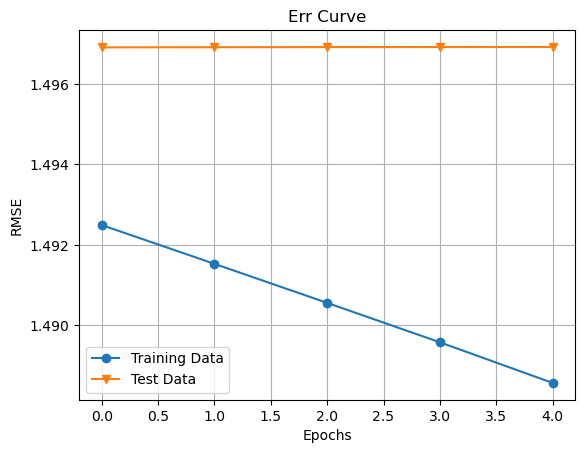

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from ProbabilisticMatrixFactorization import PMF

df_train = pd.read_csv('train.csv', sep=',', index_col=False)
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_train[['user', 'item', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Los sets se tienen que convertir a numpy array
train_data = np.array([[uid, iid, rating] for (uid, iid, rating) in trainset.all_ratings()])
test_data = np.array([[uid, iid, rating] for (uid, iid, rating) in testset])

# modelo PMF
pmf = PMF()
pmf.set_params({
    "num_feat": 10,  
    "epsilon": 1,  
    "_lambda": 0.1,  
    "momentum": 0.8,  
    "maxepoch": 5,  
    "num_batches": 100,  
    "batch_size": 1000  
})

pmf.fit(train_data, test_data)

plt.plot(range(pmf.maxepoch), pmf.mae_train, marker='o', label='Training Data')
plt.plot(range(pmf.maxepoch), pmf.mae_test, marker='v', label='Test Data')
plt.title('Err Curve')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
